In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt


#importacion de datos

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dtest = pd.read_csv('test.csv')
dtest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#comprensión de datos

In [ ]:
#tamaño del dataset
data.shape

(891, 12)

In [ ]:
#que tipo de datos tenemos
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#estadisticas descriptivas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
#cantidad de valores nulos en el data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
print("Survived:")
print(data['Survived'].value_counts())

Survived:
0    549
1    342
Name: Survived, dtype: int64


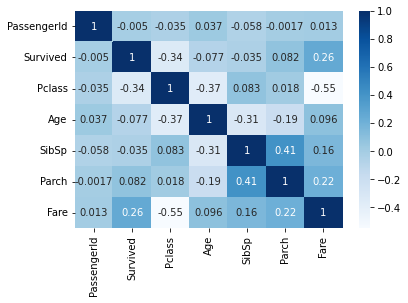

In [ ]:
#correlación entre los datos
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

#selección de caracteristicas y preparación de datos

In [ ]:
df = data[["Age","Sex","Pclass","Embarked", "Survived"
]].copy() #data reducida
dtrain = df.fillna(999)

In [ ]:
dtrain['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
dtrain['Embarked'].replace(['S', 'C', 'Q'],
                        [0, 1, 2], inplace=True)
dtrain.apply (pd.to_numeric, errors='coerce')
df = dtrain
df
#en age y embarked hay un nan que no se comoquitar

,Age,Sex,Pclass,Embarked,Survived
0,22.0,0,3,0,0
1,38.0,1,1,1,1
2,26.0,1,3,0,1
3,35.0,1,1,0,1
4,35.0,0,3,0,0
...,...,...,...,...,...
886,27.0,0,2,0,0
887,19.0,1,1,0,1
888,999.0,1,3,0,0
889,26.0,0,1,1,1


In [ ]:
ddtest = dtest[["Age","Sex","Pclass","Embarked"
]].copy() #data reducida
ddtest['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
ddtest['Embarked'].replace(['S', 'C', 'Q'],
                        [0, 1, 2], inplace=True)
dtest = ddtest.fillna(999)
dtest = dtest.apply (pd.to_numeric, errors='coerce')
dtest.fillna(999)
dtest

,Age,Sex,Pclass,Embarked
0,34.5,0,3,2
1,47.0,1,3,0
2,62.0,0,2,2
3,27.0,0,3,0
4,22.0,1,3,0
...,...,...,...,...
413,999.0,0,3,0
414,39.0,1,1,1
415,38.5,0,3,0
416,999.0,0,3,0


In [ ]:
df.head()

,Age,Sex,Pclass,Embarked,Survived
0,22.0,0,3,0,0
1,38.0,1,1,1,1
2,26.0,1,3,0,1
3,35.0,1,1,0,1
4,35.0,0,3,0,0


In [ ]:
dtest.head()

,Age,Sex,Pclass,Embarked
0,34.5,0,3,2
1,47.0,1,3,0
2,62.0,0,2,2
3,27.0,0,3,0
4,22.0,1,3,0


#definir data de entrenamiento y prueba

In [ ]:
df.head()

,Age,Sex,Pclass,Embarked,Survived
0,22.0,0,3,0,0
1,38.0,1,1,1,1
2,26.0,1,3,0,1
3,35.0,1,1,0,1
4,35.0,0,3,0,0


In [ ]:
feature_names = [ 'Age', 'Sex', 'Pclass', 'Embarked']
X = df[feature_names] #variables predictoras
y = df['Survived'] #variable de respuesta

XX = dtest[feature_names] #variables predictoras

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

#X_train = X
#y_train = y

#X_test = XX
#y_test = yy

#probando los modelos de IA

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

##primera prediccion 
usando knn

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)
y_pred_1 = knn1.predict(X_test)
print(accuracy_score(y_test, y_pred_1))

0.7366946778711485


In [ ]:
#primera prediccion usando el test.csv
y1 = knn1.predict(XX)

resultados1 = pd.DataFrame(y1, columns=['Survived'])
ids = list(range(892,1310))

resultados1 = resultados1.assign(PassengerId=ids)
resultados1 = resultados1[['PassengerId','Survived']]
resultados1.to_csv('prueba1.csv')

##segunda prediccion
mejorando knn

In [ ]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

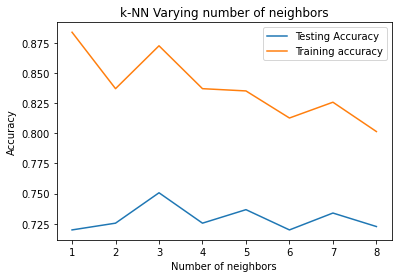

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7507002801120448


In [ ]:
#segunda prediccion usando el test.csv
y2 = knn2.predict(XX)

resultados2 = pd.DataFrame(y2, columns=['Survived'])
ids = list(range(892,1310))

resultados2 = resultados2.assign(PassengerId=ids)
resultados2 = resultados2[['PassengerId','Survived']]
resultados2.to_csv('prueba2.csv')

##tercera predicción 
utilizando otros metodos

In [ ]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.736695
1  SVC  0.616246
2   LR  0.806723
3   DT  0.795518
4  GNB  0.619048
5   RF  0.795518
6   GB  0.812325


In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8123249299719888


In [ ]:
#tercera prediccion usando el test.csv
y3 = gb.predict(XX)

resultados3 = pd.DataFrame(y3, columns=['Survived'])
ids = list(range(892,1310))

resultados3 = resultados3.assign(PassengerId=ids)
resultados3 = resultados3[['PassengerId','Survived']]
resultados3.to_csv('prueba3.csv')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

In [ ]:
# evaluate the model
gbcCV = GradientBoostingClassifier()
gbcCV.fit(X, y)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(gbcCV, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset

Accuracy: 0.818 (0.036)


In [ ]:
#tercera prediccion usando el test.csv
y4 = gbcCV.predict(XX)

resultados4 = pd.DataFrame(y4, columns=['Survived'])
ids = list(range(892,1310))

resultados4 = resultados4.assign(PassengerId=ids)
resultados4 = resultados4[['PassengerId','Survived']]
resultados4.to_csv('prueba3.csv')

##4 mejora
agregamos una nueva caracteristica #parch

In [ ]:
df = data[["Age","Sex","Pclass","Embarked", "Fare", 'SibSp', "Survived",
]].copy() #data reducida
dtrain = df.fillna(999)

In [ ]:
dtest = pd.read_csv('test.csv')
dtest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
dtrain['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
dtrain['Embarked'].replace(['S', 'C', 'Q'],
                        [0, 1, 2], inplace=True)

numc = list(range(1,149))
#dtrain['Cabin'].replace(df.Cabin.unique(),
                 #       numc, inplace=True)
dtrain.apply (pd.to_numeric, errors='coerce')
df = dtrain
#en age y embarked hay un nan que no se comoquitar

In [ ]:
df

,Age,Sex,Pclass,Embarked,Fare,SibSp,Survived
0,22.0,0,3,0,7.2500,1,0
1,38.0,1,1,1,71.2833,1,1
2,26.0,1,3,0,7.9250,0,1
3,35.0,1,1,0,53.1000,1,1
4,35.0,0,3,0,8.0500,0,0
...,...,...,...,...,...,...,...
886,27.0,0,2,0,13.0000,0,0
887,19.0,1,1,0,30.0000,0,1
888,999.0,1,3,0,23.4500,1,0
889,26.0,0,1,1,30.0000,0,1


In [ ]:
ddtest = dtest[["Age","Sex","Pclass","Embarked","Fare", 'SibSp'
]].copy() #data reducida
ddtest['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
ddtest['Embarked'].replace(['S', 'C', 'Q'],
                        [0, 1, 2], inplace=True)
numc = list(range(1,149))
#dtrain['Cabin'].replace(df.Cabin.unique(),
    #                    numc, inplace=True)
dtrain.apply (pd.to_numeric, errors='coerce')
dtest = ddtest.fillna(999)
dtest = dtest.apply (pd.to_numeric, errors='coerce')
dtest.fillna(999)
dtest

,Age,Sex,Pclass,Embarked,Fare,SibSp
0,34.5,0,3,2,7.8292,0
1,47.0,1,3,0,7.0000,1
2,62.0,0,2,2,9.6875,0
3,27.0,0,3,0,8.6625,0
4,22.0,1,3,0,12.2875,1
...,...,...,...,...,...,...
413,999.0,0,3,0,8.0500,0
414,39.0,1,1,1,108.9000,0
415,38.5,0,3,0,7.2500,0
416,999.0,0,3,0,8.0500,0


In [ ]:
feature_names = [ 'Age', 'Sex', 'Pclass', 'Embarked', 'Fare', 'SibSp']
X = df[feature_names] #variables predictoras
y = df['Survived'] #variable de respuesta

XX = dtest[feature_names] #variables predictoras

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [ ]:
gbHP = GradientBoostingClassifier()
gbHP.fit(X_train, y_train)
y_pred = gbHP.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8235294117647058


In [ ]:
#sexta prediccion usando el test.csv
y6 = gbHP.predict(XX)

resultados6 = pd.DataFrame(y6, columns=['Survived'])
ids = list(range(892,1310))

resultados6 = resultados6.assign(PassengerId=ids)
resultados6 = resultados6[['PassengerId','Survived']]
resultados6.to_csv('prueba4.csv')

##quinta prueba 
ajuste de hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
ddtest = dtest[["Age","Sex","Pclass","Embarked"
]].copy() #data reducida
ddtest['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
ddtest['Embarked'].replace(['S', 'C', 'Q'],
                        [0, 1, 2], inplace=True)
numc = list(range(1,149))
#dtrain['Cabin'].replace(df.Cabin.unique(),
    #                    numc, inplace=True)
dtrain.apply (pd.to_numeric, errors='coerce')
dtest = ddtest.fillna(999)
dtest = dtest.apply (pd.to_numeric, errors='coerce')
dtest.fillna(999)
dtest

,Age,Sex,Pclass,Embarked
0,34.5,0,3,2
1,47.0,1,3,0
2,62.0,0,2,2
3,27.0,0,3,0
4,22.0,1,3,0
...,...,...,...,...
413,999.0,0,3,0
414,39.0,1,1,1
415,38.5,0,3,0
416,999.0,0,3,0


In [ ]:
feature_names = [ 'Age', 'Sex', 'Pclass', 'Embarked']
X = df[feature_names] #variables predictoras
y = df['Survived'] #variable de respuesta

XX = dtest[feature_names] #variables predictoras


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)


In [ ]:
param_grid = {
    "n_estimators":[5,50,250,500]}

gbcHP = GradientBoostingClassifier()
gbcHP_cv= GridSearchCV(gbcHP,param_grid,cv=5)
gbcHP_cv.fit(X,y)
print(gbcHP_cv.best_score_)
print(gbcHP_cv.best_params_)

0.8137216747222397
{'n_estimators': 50}


In [ ]:
param_grid = {
    "max_depth":[1,3,5,7,9]
}
gbcHP = GradientBoostingClassifier()
gbcHP_cv= GridSearchCV(gbcHP,param_grid,cv=5)
gbcHP_cv.fit(X,y)
print(gbcHP_cv.best_score_)
print(gbcHP_cv.best_params_)

0.8215868432615656
{'max_depth': 3}


In [ ]:
param_grid = {
    "learning_rate":[0.01,0.05,0.1,0.15,0.2]
}
gbcHP = GradientBoostingClassifier()
gbcHP_cv= GridSearchCV(gbcHP,param_grid,cv=5)
gbcHP_cv.fit(X,y)
print(gbcHP_cv.best_score_)
print(gbcHP_cv.best_params_)

0.8215868432615656
{'learning_rate': 0.1}


In [ ]:
gbHP = GradientBoostingClassifier(n_estimators = 50, max_depth=3, learning_rate=0.1 )
gbHP.fit(X_train, y_train)
y_pred = gbHP.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8207282913165266


In [ ]:
#quinta prediccion usando el test.csv
y5 = gbHP.predict(XX)

resultados5 = pd.DataFrame(y5, columns=['Survived'])
ids = list(range(892,1310))

resultados5 = resultados5.assign(PassengerId=ids)
resultados5 = resultados5[['PassengerId','Survived']]
resultados5.to_csv('prueba5.csv')